In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load each dataset
cleavland_dataset = pd.read_csv("Cleavland.csv", header=None, names=col_names)
hung_dataset = pd.read_csv("hung.csv", header=None, names=col_names)
switzerland_dataset = pd.read_csv("Switzerland.csv", header=None, names=col_names)

In [34]:
cleavland_dataset.shape

(303, 14)

In [35]:
hung_dataset.shape

(294, 14)

In [36]:
switzerland_dataset.shape

(123, 14)

In [37]:
all_data = pd.concat([cleavland_dataset, hung_dataset, switzerland_dataset], ignore_index=True)
all_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [38]:
all_data.shape

(720, 14)

In [39]:
df = all_data

# **Data Cleaning (Remove NA, ?, Negative values, etc.)**

In [40]:
for col in col_names:
  print(col, df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '130' '120' '140' '170' '100' '105' '110' '125' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95' '165'
 '80' '185']
chol [233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0 206.0
 219.0 340.0 226.0 247.0 167.0 230.0 335.0 234.0 177.0 276.0 353.0 243.0
 225.0 302.0 212

In [41]:
# We can see there is inconsistency in above data as some values are of type string and some of type int to handle this
# Convert columns to proper numeric format
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
# We use pd.to_numeric() to convert the specified columns to numeric format.
# The errors='coerce' parameter ensures that any values that cannot be converted to numeric format will be replaced with NaN (missing values).

In [42]:
for col in col_names:
  print(col, df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 

### **Fill missing values with their mean**

In [43]:
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalach'].fillna(df['thalach'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [44]:
# As ca and thal values have limited set of specific values so we will replace null values with mode
# Mode will give me max occured frequency of them
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

In [45]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Error Correcting: Outlier Detection and Removal**

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

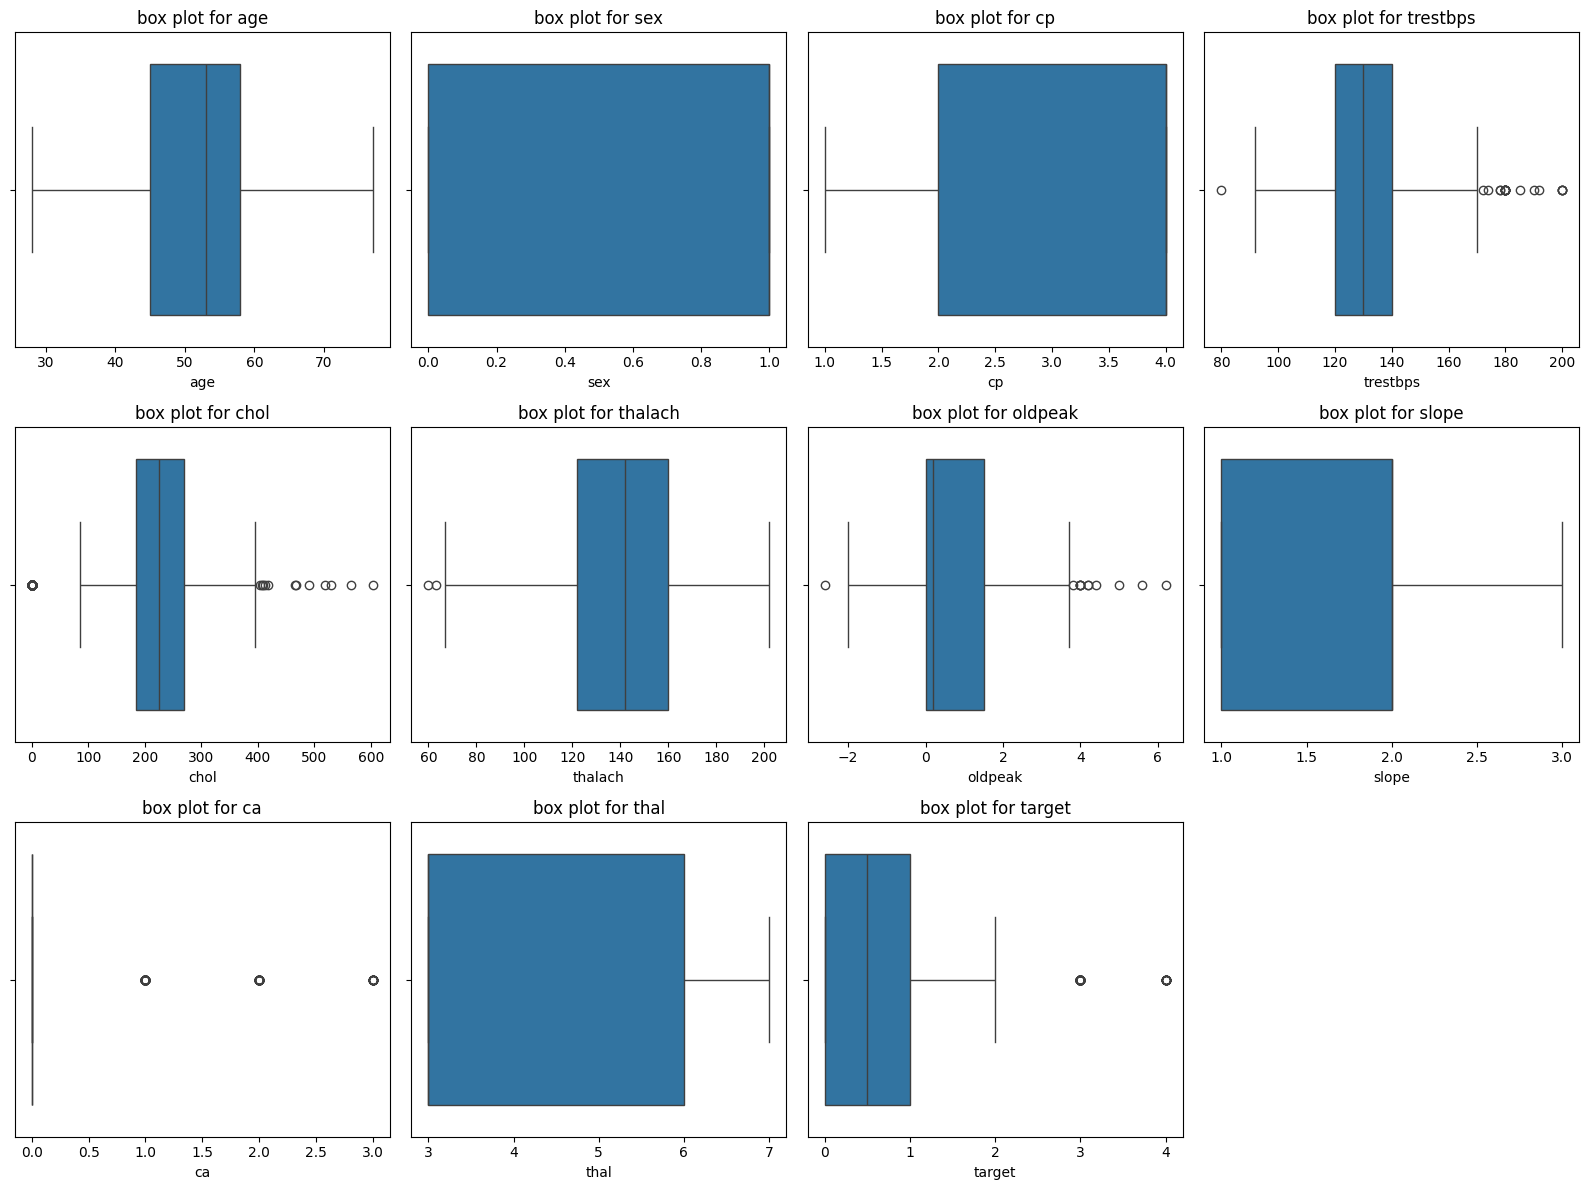

In [47]:
def visualize_boxplots(df):

  # get the number of numerical columns
  num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)

  num_rows = (num_cols + 3) // 4
  num_cols = min(num_cols, 4)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

  # flatten axes if needed
  axes = axes.flatten()

  for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(ax=axes[i], x=df[column])
    axes[i].set_xlabel(column)
    axes[i].set_title(f'box plot for {column}')


  for j in range(i+1, len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

visualize_boxplots(df)

In [48]:
# Define threshold values for each column
threshold_values = {
    'age': 70,
    'sex': 1,
    'cp': 4,
    'trestbps': 170,
    'chol': 395,
    'thalach': 1,
    'oldpeak': 3,
    'thalach': 250,
    'target': 3,
    'oldpeak': 3.5,
    'slope': 3,
    'ca': 5,  # Update threshold value for 'ca' column
    'thal': 10  # Update threshold value for 'thal' column
}

Removing outliers for columns : age


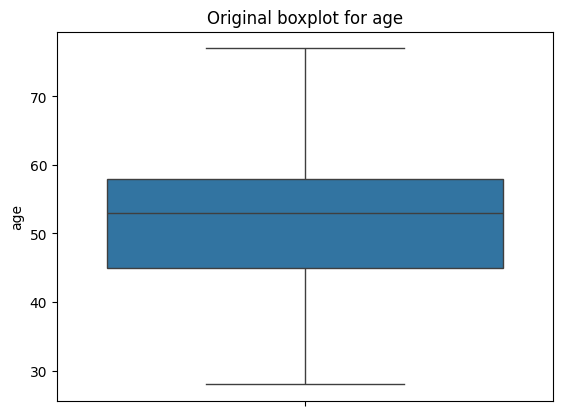

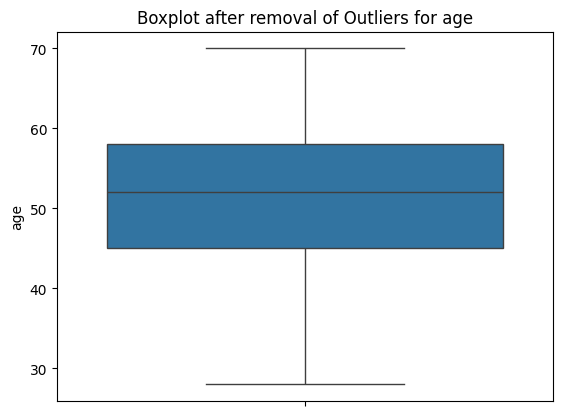

Removing outliers for columns : sex


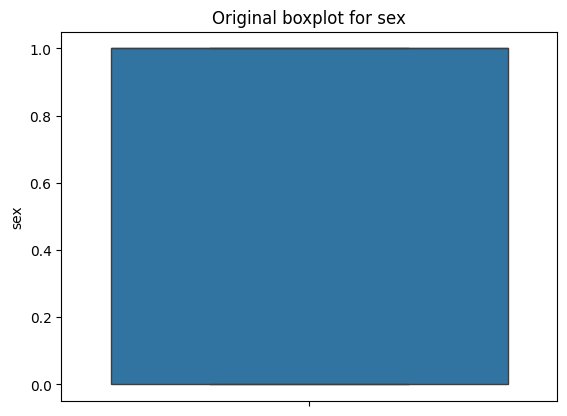

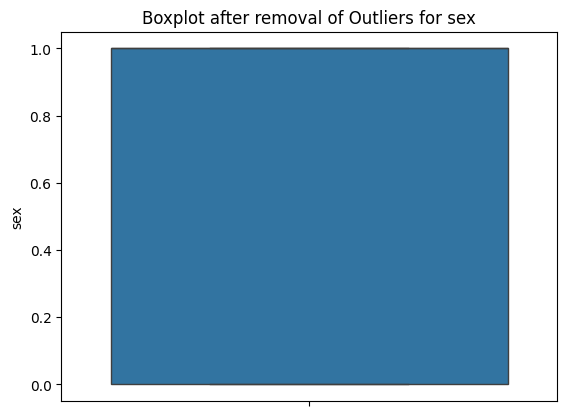

Removing outliers for columns : cp


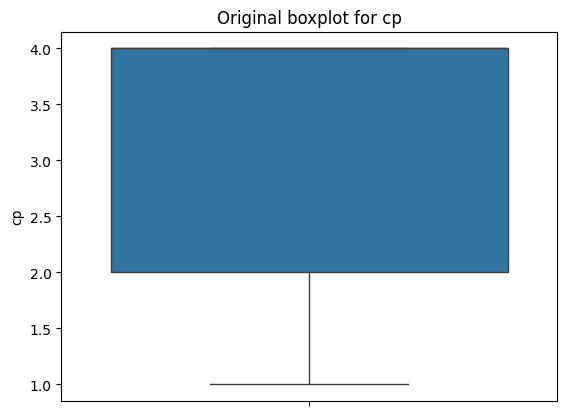

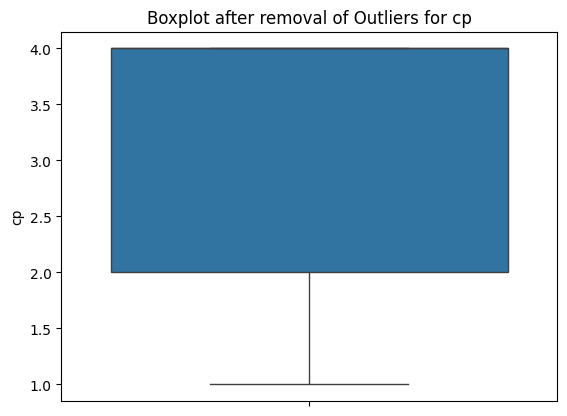

Removing outliers for columns : trestbps


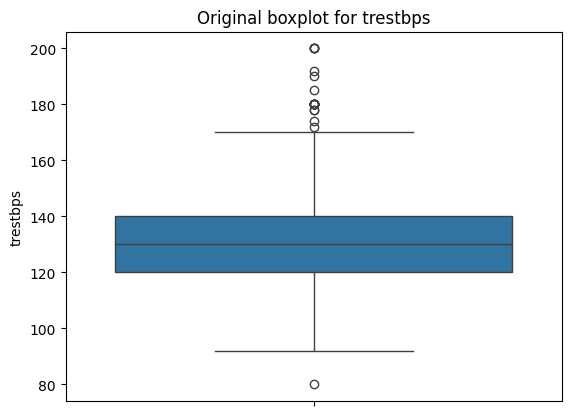

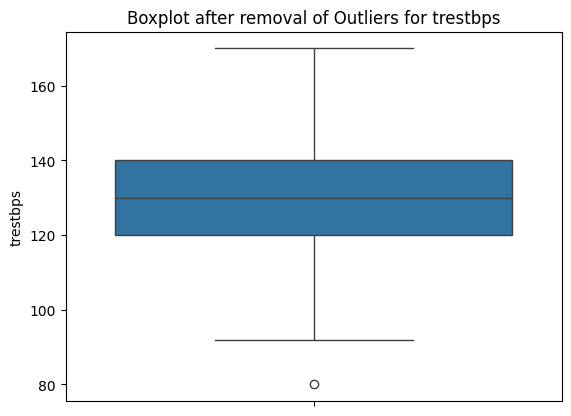

Removing outliers for columns : chol


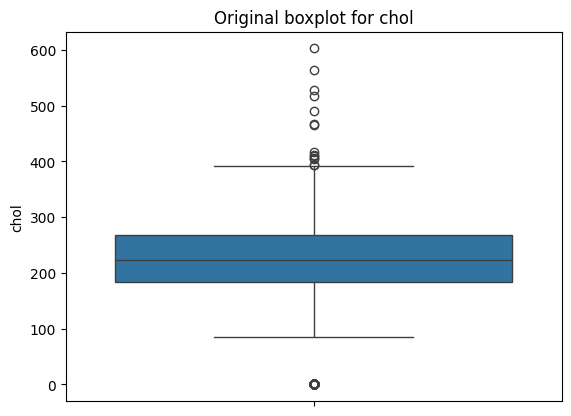

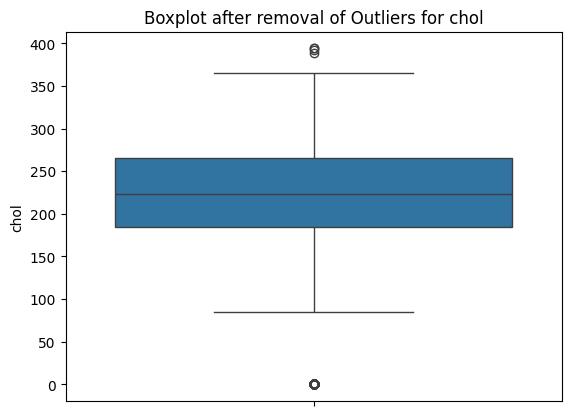

Removing outliers for columns : thalach


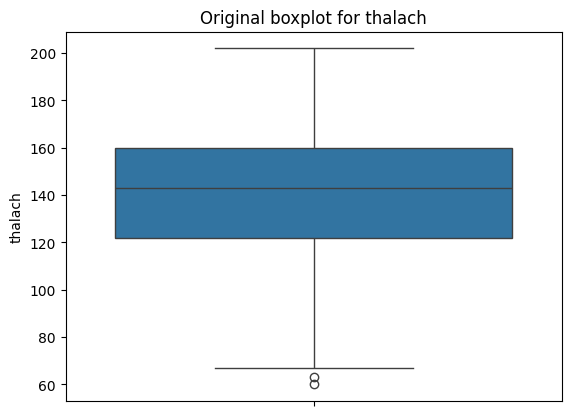

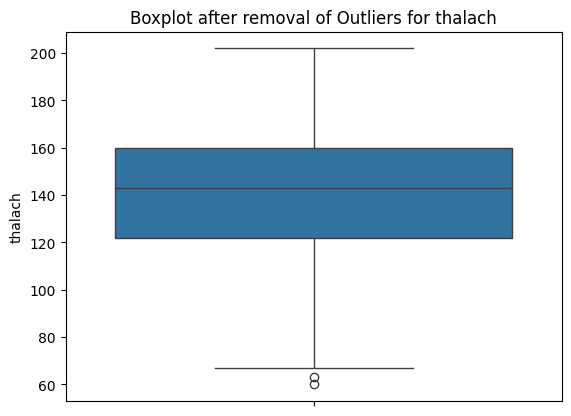

Removing outliers for columns : oldpeak


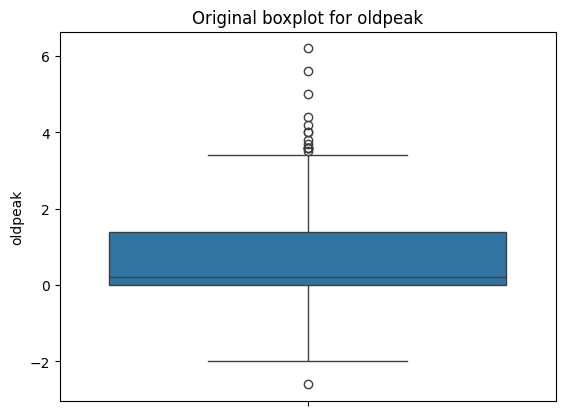

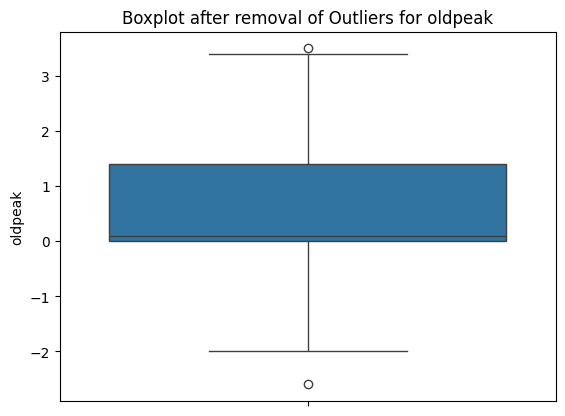

Removing outliers for columns : target


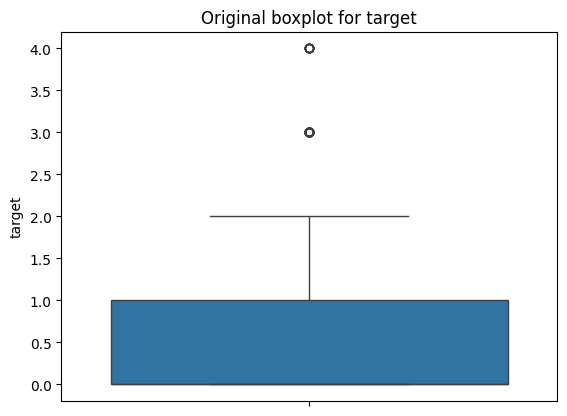

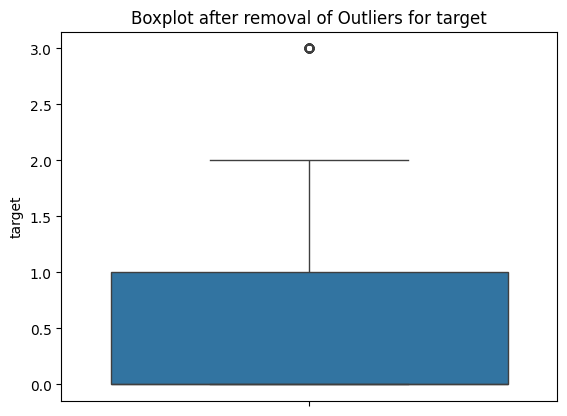

Removing outliers for columns : slope


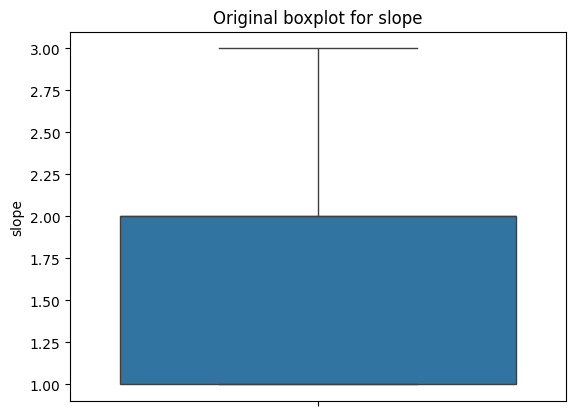

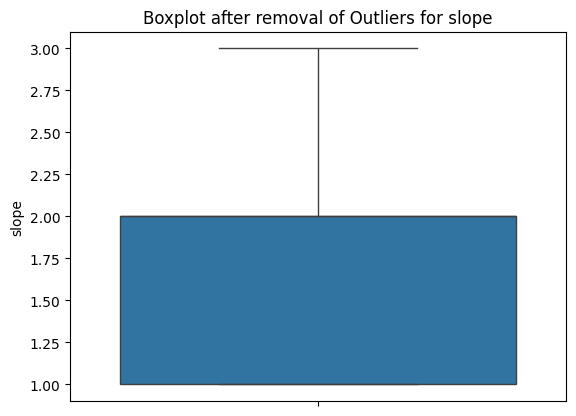

Removing outliers for columns : ca


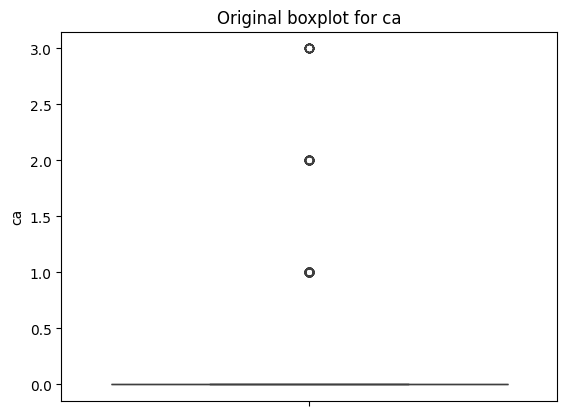

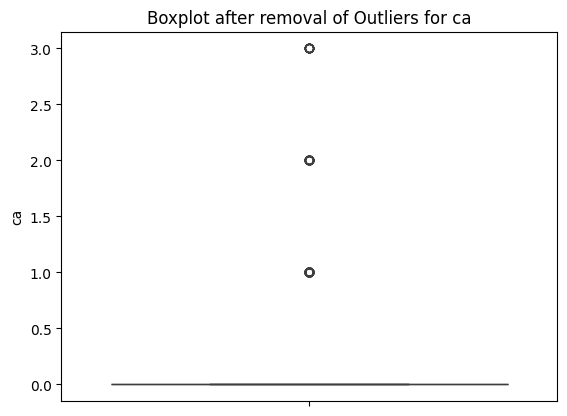

Removing outliers for columns : thal


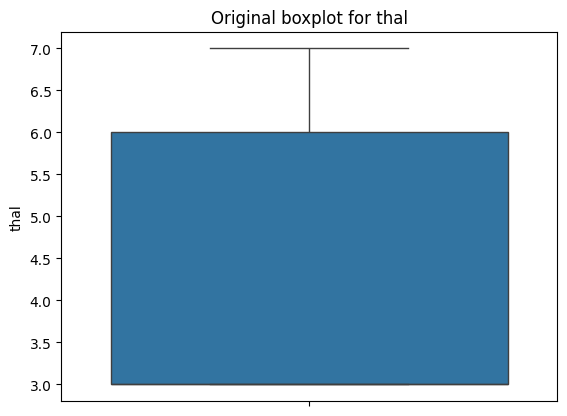

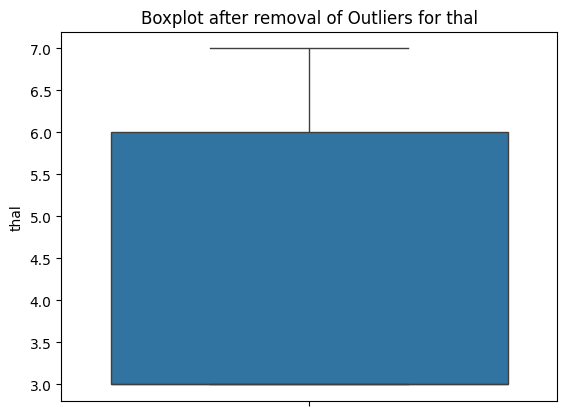

In [56]:
def removal_boxplot(df, column, threshold):

  sns.boxplot(df[column])
  plt.title(f'Original boxplot for {column}')
  plt.show()

  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Boxplot after removal of Outliers for {column}')
  plt.show()
  return removed_outliers


def removal_outliers_for_all_columns(df, threshold_values):
  # Iterate over each column and corresponding threshold value
  for column, threshold in threshold_values.items():

    print(f'Removing outliers for columns : {column}')
    df = removal_boxplot(df, column, threshold)

  return df

new_df = removal_outliers_for_all_columns(df, threshold_values)

# **c. Data transformation**
## **One-Hot Encoding:**
One-hot encoding is used to convert categorical variables into a binary matrix, where each category becomes a separate binary feature.
Each category is represented by a binary column, where a value of 1 indicates the presence of the category and 0 indicates absence.
This technique is useful when there is no ordinal relationship between categories.
## **Label Encoding:**
Label encoding is used to convert categorical variables into numerical labels.
Each category is assigned a unique integer value.
This technique is suitable when there is an ordinal relationship between categories.

In [57]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.00000,0.0,2.300000,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.00000,1.0,1.500000,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.00000,1.0,2.600000,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.00000,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.00000,0.0,1.400000,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,68.0,1.0,4.0,145.000000,0.0,?,0,136.00000,0,1.800000,1.0,0.0,3.0,1
713,69.0,1.0,4.0,135.000000,0.0,0,0,130.00000,0,0.000000,2.0,0.0,6.0,1
714,69.0,1.0,4.0,131.804742,0.0,0,1,140.56546,?,0.789636,2.0,0.0,7.0,3
715,70.0,1.0,4.0,115.000000,0.0,0,1,92.00000,1,0.000000,2.0,0.0,7.0,1


In [59]:
df['sex'].replace(['F', 'M'], [0, 1], inplace=True)

In [67]:
new_df[new_df['sex'] == 0].count().unique()
(new_df.values == '?').sum()
new_df = new_df.replace('?', np.nan)
new_df = new_df.dropna()

# **Build Data model using regression and kNN methods and compare accuracy of heart disease prediction**

<Axes: >

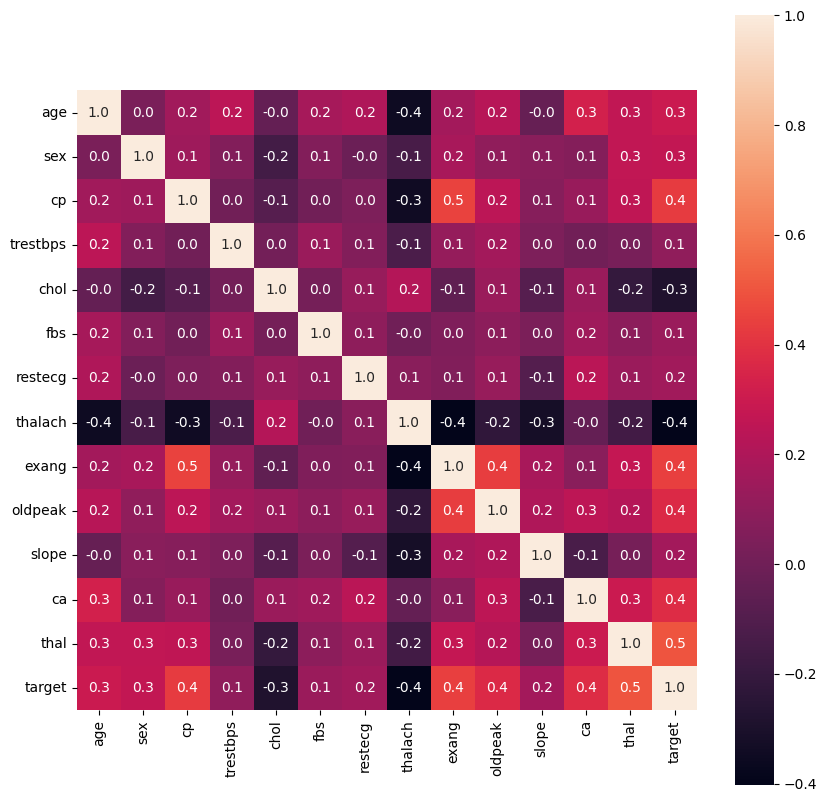

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(data=new_df.corr(), cbar=True, square=True, fmt='.1f', annot=True)

In [72]:
attribute = new_df[['age', 'sex', 'cp', 'thal', 'oldpeak', 'ca']]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(attribute, new_df['target'], test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error

In [77]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_pred = lr.predict(x_test)

In [79]:
print('Accuracy of Logistic Regression : ', accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression :  0.653179190751445


In [80]:
from sklearn.neighbors import KNeighborsClassifier

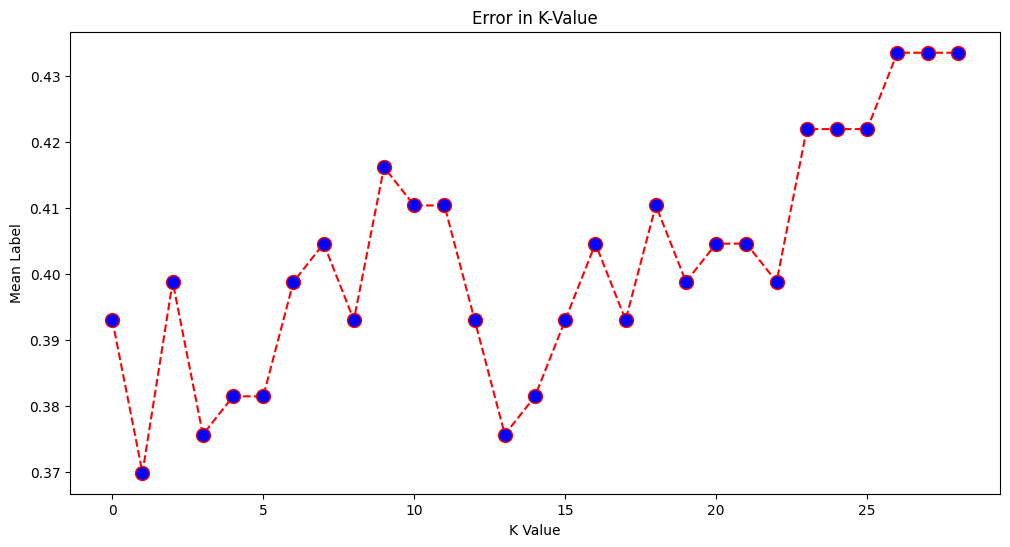

In [84]:
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  k_pred = knn.predict(x_test)
  error.append(np.mean(k_pred != y_test))

plt.figure(figsize=(12, 6))
plt.plot(error, color='red', marker='o', markerfacecolor='blue', linestyle='dashed', markersize=10)
plt.title('Error in K-Value')
plt.xlabel('K Value')
plt.ylabel('Mean Label')
plt.show()

In [86]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat


array([[86, 10,  3,  1],
       [19, 18,  4,  0],
       [ 6,  6,  3,  2],
       [ 3,  8,  4,  0]])

In [87]:
print('Accuracy of K Neighbors classifier : ', accuracy_score(y_test, y_pred))

Accuracy of K Neighbors classifier :  0.6184971098265896
